# Calculo analítico para estados estacionarios 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
from sympy import init_printing
init_printing() 

In [6]:
init_printing()
c = Symbol('c', real=True)  # positive constant, greater than 1 implies cooperativity, less than 1 anti-cooperativity
a_Gli = Symbol('a_Gli', real=True)   # transcriptional activation intensity for Gli
a_Gli3 = Symbol('a_Gli3', real=True)   # transcriptional activation intensity for Gli
r_Gli3R = Symbol('r_Gli3R', real=True)   # transcriptional repression intensity for Gli
k_Gli = Symbol('k_Gli', real=True)   # dissociation constant of activators for gene enhancers
k_Gli3 = Symbol('k_Gli3', real=True)   # dissociation constant of activators for gene enhancers
k_Gli3R = Symbol('k_Gli3R', real=True)   # dissociation constant of repressors for gene enhancers
k_RNAP = Symbol('k_RNAP', real=True)   # RNA polymerase binding affinity
RNAP = Symbol('RNAP', real=True)   # RNA polymerase concentration
c_b = Symbol('c_b', real=True)   # BEWARE constant

# from Lai-Schaffer classic model

Shh = Symbol('Shh', real=True)   # Shh quantity [0,30]
k_shh = Symbol('k_shh', real=True)   # dissociation constant shh-ptc bindings [0.58,2.0]
k_ptc = Symbol('k_ptc', real=True)   # half maximal concentration of ptc which inhibits smo signlaing
k_deg = Symbol('k_deg', real=True)   # degradation constant for all Gli related proteins
k_g3rc = Symbol('k_g3rc', real=True)   # rate constant for the conversion to signal strengh
r_g3b = Symbol('r_g3b', real=True)   # basal rate of Gli3 synthesis
K_g3rc = Symbol('K_g3rc', real=True)   # sensitivity constant of the conversion to signal strengh
k_deg_p = Symbol('k_deg_p', real=True)  # Degradation rate constant for Ptc [0.045,0.071]
 
Gli = Symbol('Gli', real=True)
Gli3 = Symbol('Gli3', real=True)
Gli3R = Symbol('Gli3R', real=True)
Ptc = Symbol('Ptc', real=True)
F_reg = Symbol('F_reg', real=True)
#---------
v_max = Symbol('v_max', real=True)
r_bas = Symbol('r_bas', real=True)
v_maxp = Symbol('v_maxp', real=True)
r_basp = Symbol('r_basp', real=True)
r = Symbol('r', real=True)
e = Symbol('e', real=True)
K1 = Symbol('K1', real=True)
K2 = Symbol('K2', real=True)
k_cc = Symbol('k_cc', real=True)

In [7]:
Ptc = k_cc*Gli
limit(Ptc,Gli,0)

In [ ]:
Signal = (1+(Shh/k_shh))/(1+(Shh/k_shh)+(Ptc/k_ptc))
Gli3 = (r_g3b*(K_g3rc+Signal))/((k_deg*(K_g3rc+Signal)+k_g3rc)*Gli)
Gli3R = (r_g3b)/(k_deg*Gli)-Gli3
Basal = (3*c*K1*K2*(Gli3*K1+ Gli*K2 + Gli3R*K1*r)**2 + c**2*(Gli3*K1 + Gli*K2 + Gli3R*K1*r)**3 + K1**2*K2**2*(3*Gli3*K1 + 3*Gli*K2 + K1*(K2+ 3*Gli3R*r)))/ (3*c*K1*K2*(Gli3*K1 + Gli3R*K1 + Gli*K2)**2 + c**2*(Gli3*K1 + Gli3R*K1 + Gli*K2)**3 + K1**2*K2**2*(3*Gli3*K1 + 3*Gli3R*K1 + (3*Gli +K1)*K2))
Promoter = ((Gli3*K1+Gli*K2)*(3*e**2*K1**2*K2**2+3*c*e*K1*K2*(Gli3*K1+Gli*K2+2*e*Gli3R*K1*r)+c**2*(Gli3**2*K1**2+Gli**2*K2**2+3*e*Gli*Gli3R*K1*K2*r + 3*e**2*Gli3R**2*K1**2*r**2 + Gli3*K1*(2*Gli*K2 + 3*e*Gli3R*K1*r))))/(3*c*K1*K2*(Gli3*K1 + Gli3R*K1 + Gli*K2)**2 + c**2*(Gli3*K1 + Gli3R*K1 + Gli*K2)**3 +K1**2*K2**2*(3*Gli3*K1 + 3*Gli3R*K1 + (3*Gli + K1)*K2))
limit(Promoter,Gli,0)

In [14]:
Gli3+Gli3R=r_g3b/(Gli*k_deg)

SyntaxError: can't assign to operator (<ipython-input-14-e8e957a72136>, line 1)

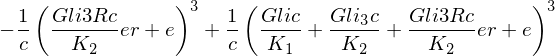

In [19]:
Promoter=(1/c*(e+c*Gli*K1**-1+c*Gli3*K2**-1+e*r*c*Gli3R*K2**-1)**3-1/c*(e+e*r*c*Gli3R*K2**-1)**3)/(1-1/c+1/c*(1+c*Gli*K1**-1+c*K2**-1*(Gli3+Gli3R))**3)
Promoter.subs({Gli3 + Gli3R: r_g3b/(Gli*k_deg)}).simplify()
Num_Promoter=(1/c*(e+c*Gli*K1**-1+c*Gli3*K2**-1+e*r*c*Gli3R*K2**-1)**3-1/c*(e+e*r*c*Gli3R*K2**-1)**3)
Num_Promoter

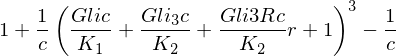

In [20]:
Basal=(1-1/c+1/c*(1+c*Gli*K1**-1+c*Gli3*K2**-1+r*c*Gli3R*K2**-1)**3)/(1-1/c+1/c*(1+c*Gli*K1**-1+c*Gli3*K2**-1+c*Gli3R*K2**-1)**3)
Basal.subs({Gli3 + Gli3R: r_g3b/(Gli*k_deg)}).simplify()
Num_Basal=(1-1/c+1/c*(1+c*Gli*K1**-1+c*Gli3*K2**-1+r*c*Gli3R*K2**-1)**3)
Num_Basal

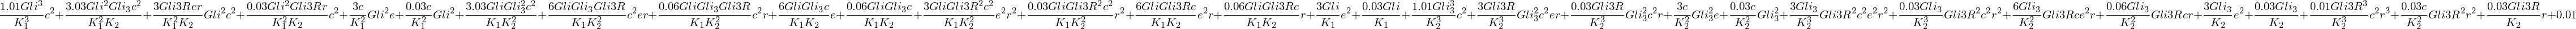

In [35]:
right_side=Num_Promoter+0.01*Num_Basal
right_side=right_side.subs({Gli3 + Gli3R: r_g3b/(Gli*k_deg)}).simplify()
expand(right_side)

In [27]:
left_side=((k_deg*Gli)/(v_max))*(1-1/c+1/c*(1+c*Gli*K1**-1+c*K2**-1*(Gli3+Gli3R))**3)
left_side=left_side.subs({Gli3 + Gli3R: r_g3b/(Gli*k_deg)}).simplify()

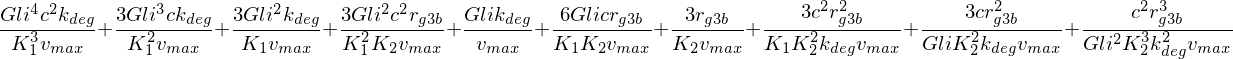

In [34]:
expand(left_side)

In [36]:
result=expand(right_side)-expand(left_side)

In [ ]:
result=result.subs({ Gli3R: r_g3b/(Gli*k_deg)-Gli3})
result=result.subs({ Gli3:(1+(Shh/k_shh))/(1+(Shh/k_shh)+(Ptc/k_Ptc))})
result=expand(result).simplify()
result.collect(Gli)